# One-dimensional upsampling via zero-padding

Below we provide a function that performs one-dimensional upsampling of an "image."

In [18]:
from numpy import zeros, append, ceil
from numpy.fft import rfft, irfft
def upsample_1d(f, n_new):

    n = len(f)
    if n == n_new:
        return f
    elif n > n_new:
        raise ValueError(f"New number of points ({n_new}) must be larger "
                         f"than the original number ({n}).")
    N = int(n_new/2-n/2)
    F = rfft(f)
    F = append(F, zeros(N))
    return n_new/n * irfft(F)

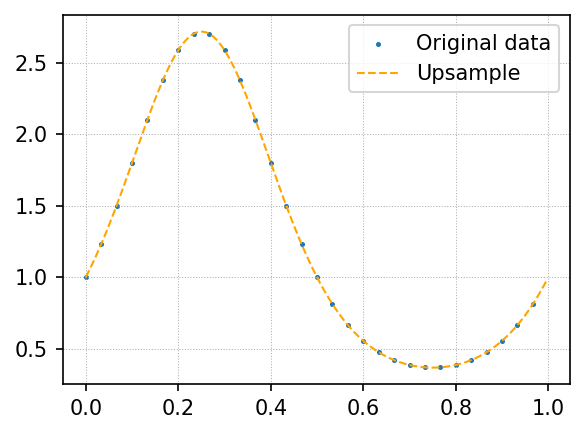

In [19]:
from numpy import arange, exp, sin, pi
import matplotlib.pyplot as plt
from IPython.display import Image

n = 30
x = arange(0, n)/n
f = exp(sin(2*pi*x))

fig = plt.figure(figsize=(4,3))

plt.scatter(x, f, s=2, label='Original data')

N = 300
y = arange(0, N)/N
plt.plot(y, upsample_1d(f, N), lw=1, c='orange', ls='--', label='Upsample')

plt.legend()
plt.grid(lw=0.5, ls=':')
plt.tight_layout()
plt.savefig("test.png", dpi=150, facecolor='white', bbox_inches='tight')
plt.close(fig)
Image("test.png")

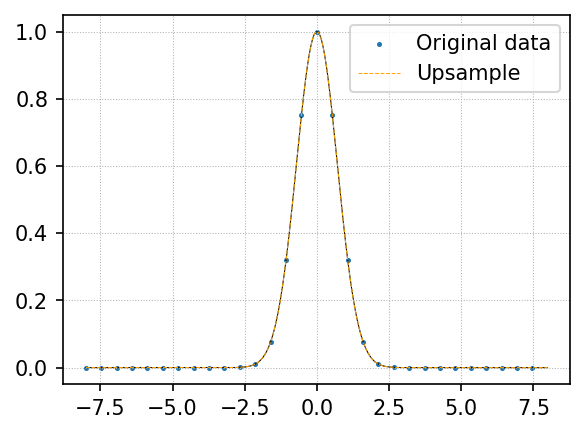

In [69]:
from numpy import linspace, exp
import matplotlib.pyplot as plt
from IPython.display import Image

n = 30
x = linspace(-8, 8, n+1)[:-1]
f = exp(-x**2)

fig = plt.figure(figsize=(4,3))

plt.scatter(x, f, s=2, label='Original data')

N = 600
y = linspace(-8, 8, N+1)[:-1]
plt.plot(y, exp(-y**2), 'k-', lw=0.5)
plt.plot(y, upsample_1d(f, N), lw=0.5, c='orange', ls='--', label='Upsample')


plt.legend()
plt.grid(lw=0.5, ls=':')
plt.tight_layout()
plt.savefig("test.png", dpi=150, facecolor='white', bbox_inches='tight')
plt.close(fig)
Image("test.png")

# Upsampling around a particular region

To upsample the signal $I(x)$ around a specific region $x\in[a,b]$, we must do more work. Following the idea of the paper, what we set

* The upsampling factor, $u$;
* The number of points in the region $[a,b]$: $S = \lceil 1.5u\rceil$;
* Compute the $S\times n$ matrix:
$$
K_{jk} = \exp\left[-2\pi i k_{j} x_{k}\right]\;,
$$
where $k_{j} = j/(n S)$ and $x_{k} = [x_{0},\ldots,x_{S-1}] = [a,\ldots,b]$.
* Compute the result at the point of interest
$$
f_{i} = K_{ij}F_{j}\;,
$$
where $F_{j}$ is the original FFT of the function $f(x)$.

In [98]:
from numpy import arange, ceil, exp, pi, outer, einsum, zeros
from numpy.fft import fft
def upsample_region_1d(f, x_new):
    
    n = len(f)
    S = len(x_new)
    u = int(S/1.5)
    a = x_new[0]
    k = arange(n)/(n*u)-a
    K = zeros((S, n),dtype=complex)
    F = fft(f)
    for i in range(S):
        for j in range(n):
            K[i][j] = exp(-2j*pi*x_new[i]*k[j])

    fu = zeros(S,dtype=complex)
    for i in range(S):
        for j in range(n):
            fu[i] += K[i,j]*F[j]
    return fu.real

In [107]:
fftfreq(10)

array([ 0. ,  0.1,  0.2,  0.3,  0.4, -0.5, -0.4, -0.3, -0.2, -0.1])

In [126]:
def my_dft(f):

    n = len(f)
    k = roll((arange(n) - n/2)/n, int(n/2))
    F = zeros(n,dtype=complex)
    for i in range(n):
        for j in range(n):
            F[i] += exp(2j*pi*i*k[j])*f[j]
    return F

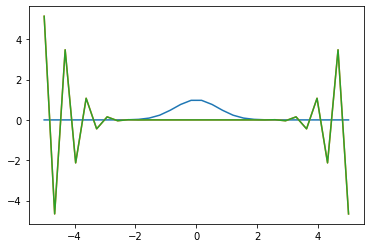

In [127]:
from numpy import linspace
import matplotlib.pyplot as plt
x = linspace(-5,5,30)
f = exp(-x**2)
y = linspace(-1.5,1.5,15)
plt.plot(x, f)
plt.plot(x, fft(f).real)
plt.plot(x, my_dft(f).real)
# plt.plot(y, upsample_region_1d(f, y))
plt.show()